**Part 1- Feature extraction**

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

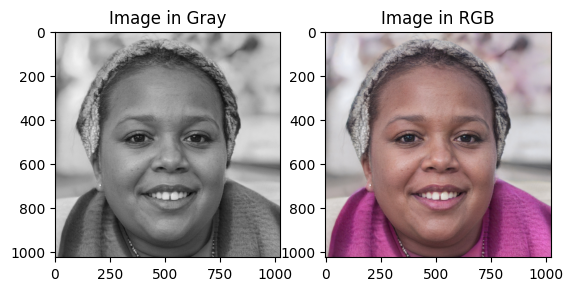

In [4]:
# Read the original image pic1 and create a regular plus a gray version of it.
# The result should be similar to what you see in instrcutions
f = plt.figure()
f.add_subplot(1, 2, 1)
orig_img = cv2.imread('/content/Assignment4_pic1.jpg')
img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title('Image in Gray')
f.add_subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title('Image in RGB')
plt.show()

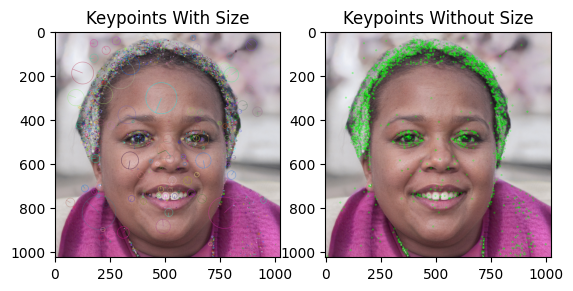

In [5]:
#a- SIFT
sift = cv2.xfeatures2d.SIFT_create()
# Find detect and compute function and apply it on top of sift
original_keypoints, original_descriptor = sift.detectAndCompute( img_gray, None)
keypoints_without_size = np.copy(img_rgb)
# You need some more codes
sized_keypoints, sized_descriptor = sift.detectAndCompute( img_gray, None)
keypoints_with_size = np.copy(img_rgb)
# Draw the result here
result1 = cv2.drawKeypoints(img_rgb, sized_keypoints, keypoints_with_size,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img_rgb, original_keypoints,keypoints_without_size, color = (0, 255, 0))

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(result1)
plt.title('Keypoints With Size')
f.add_subplot(1, 2, 2)
plt.imshow(result2)
plt.title('Keypoints Without Size')
plt.show()

The cv2.SIFT object uses Difference of Gaussians (DoG) to "detect keypoints and then computes a feature vector for the surrounding region of each keypoint" (Howse & Minchino, 2020, p.140). The detectAndCompute method returns a list of keypoints and keypoints' descriptors. The keypoints are drawn onto the image and displayed with a flag indicating the type of visualization used. In the first image, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINT is used to draw a visualization of the scale and orientation of each keypoint, while the second image indicates the location of the keypoints but not the scale or orientation.

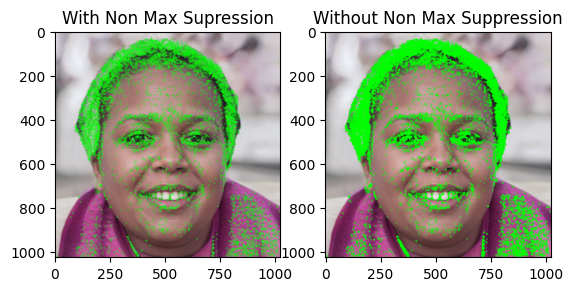

In [6]:
# b- FAST
fast = cv2.FastFeatureDetector_create()
# Find detect and compute function and apply it on top of fast
keypoints_with_nonmax = fast.detect(img_gray, None)
fast.setNonmaxSuppression(False)
image_with_nonmax = np.copy(img_rgb)
# You need some more code here
keypoints_without_nonmax = fast.detect(img_gray, None)
image_without_nonmax = np.copy(img_rgb)
# Draw the result
# Use above approach to create result 1 and result 2 and draw them
result1 = cv2.drawKeypoints(img_rgb, keypoints_with_nonmax, image_with_nonmax,color = (0, 255, 0))
result2 = cv2.drawKeypoints(img_rgb, keypoints_without_nonmax,image_without_nonmax, color = (0, 255, 0))

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(result1)
plt.title('With Non Max Supression')
f.add_subplot(1, 2, 2)
plt.imshow(result2)
plt.title('Without Non Max Suppression')
plt.show()

The Features from Accelerated Segment Test (FAST) algorithm checks brightness of the pixels around a point of interest to determine if it is a corner. A threshold is determined relative to the center point and marks all the pixels in the circular neighborhood as darker or brighter. A corner is determined if a certain number of pixels are marked as brighter/darker. A problem that arises is that multiple interest points are detected beside each other. This is shown in the image on the right where multiple keypoints are illustrated close to each other. By applying max suppression, the sum of absolute differences is applied to determine which point is more important. The keypoint that is deemed as less important is dropped as shown in the image on the right (Howse & Minchino, 2020).

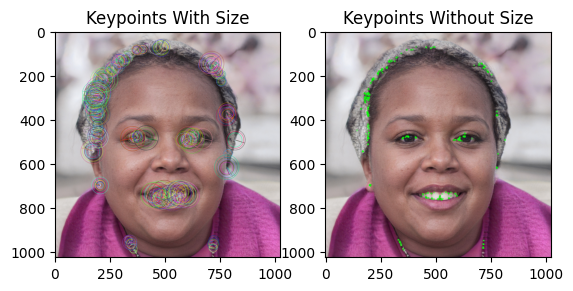

In [7]:
# c- ORB
orb = cv2.ORB_create()
original_keypoints, original_descriptor = orb.detectAndCompute(img_gray, None)
query_keypoints, query_descriptor = orb.detectAndCompute(img_gray, None)
keypoints_without_size = np.copy(img_rgb)
keypoints_with_size = np.copy(img_rgb)

# Draw the result
# Use above approach to create result 1 and result 2 and draw them
result1 = cv2.drawKeypoints(img_rgb, query_keypoints, keypoints_with_size,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img_rgb, original_keypoints,keypoints_without_size, color = (0, 255, 0))

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(result1)
plt.title('Keypoints With Size')
f.add_subplot(1, 2, 2)
plt.imshow(result2)
plt.title('Keypoints Without Size')
plt.show()

Oriented FAST and Rotated BRIEF (ORB) uses techniques from FAST and Binary Robust Independent Elementary Features (BRIEF) to identify keypoint descriptors in the images. These keypoint descriptors can be later used for comparison to find commonalities between two images (Howse & Minchino, 2020).

The number of matching keypoints between the original and the query image is 500



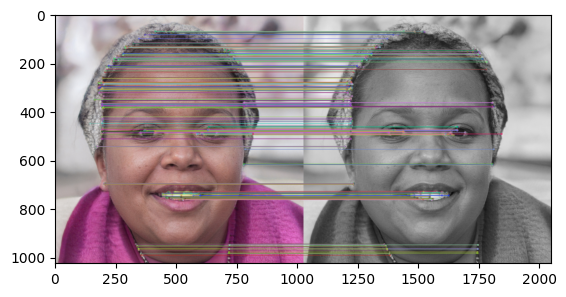

In [8]:
#d- Finding the matching points
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = brute_force.match(original_descriptor, query_descriptor)
matches = sorted(matches, key = lambda x : x.distance)
result = cv2.drawMatches(img_rgb, original_keypoints, img_gray, query_keypoints, matches, img_gray, flags = 2)
plt.imshow(result)
print("The number of matching keypoints between the original and the query image is {}\n".format(len(matches)))

The brute-force matcher compares each keypoint descriptor from one image to every keypoint descriptor in the other image to produce a distance value. The best match is the pair of keypoints that have the least distance. Brute-force matching is a type of feature matching that aims to find corresponding points between two images and allows for the identification of similar objects in different images or scenes (Howse & Minchino, 2020).

**Part 2- Face recognition**

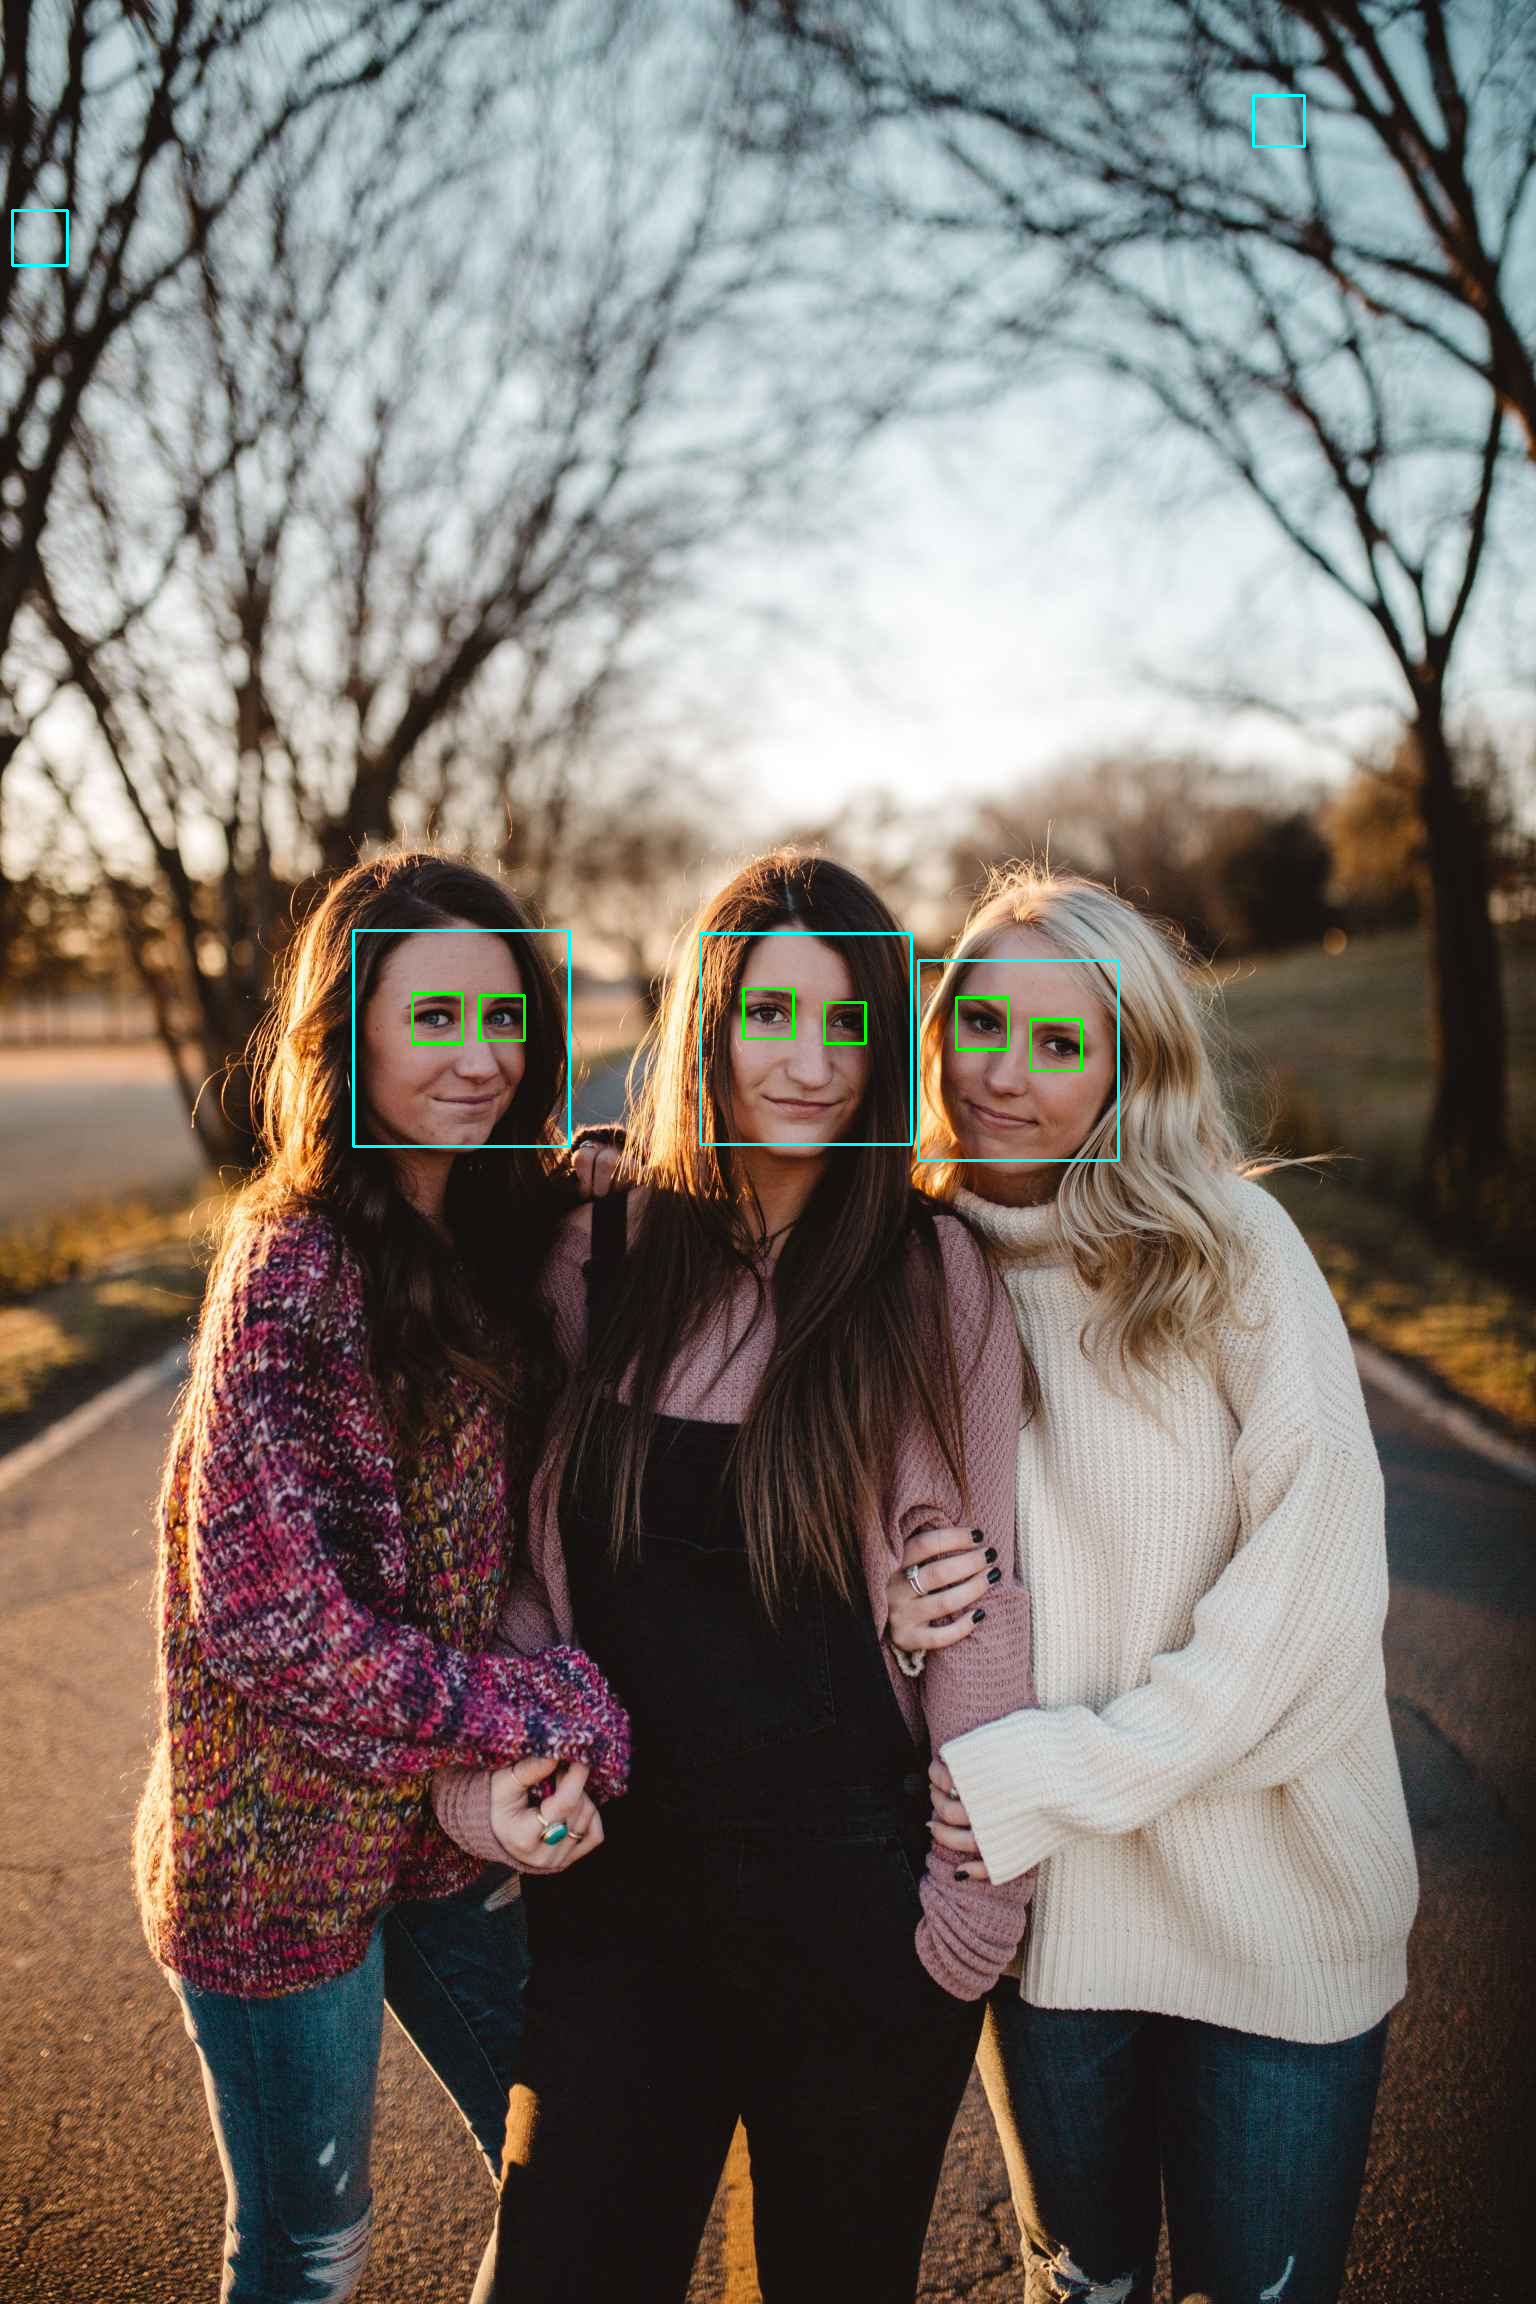

In [9]:
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/haarcascade_eye.xml")

img = cv2.imread("/content/Assignment4_pic2.jpg")
gray = cv2.imread("/content/Assignment4_pic2.jpg",0)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(img,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

cv2_imshow(img)

In [10]:
#b- Working on webcam
#Function to activate your laptop cam. This function is comp;ete and you don't need to do anything.
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

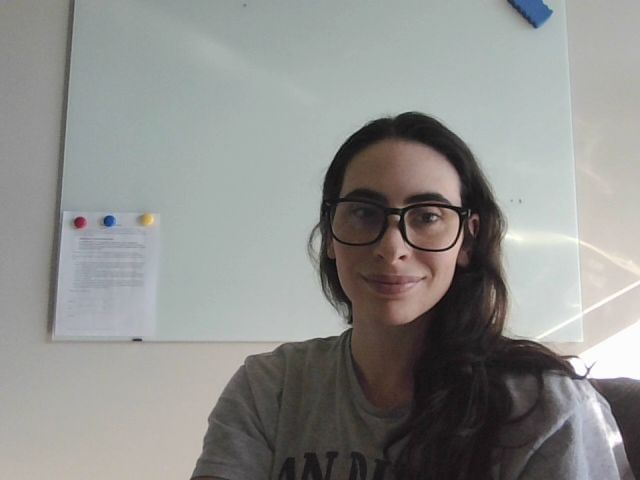

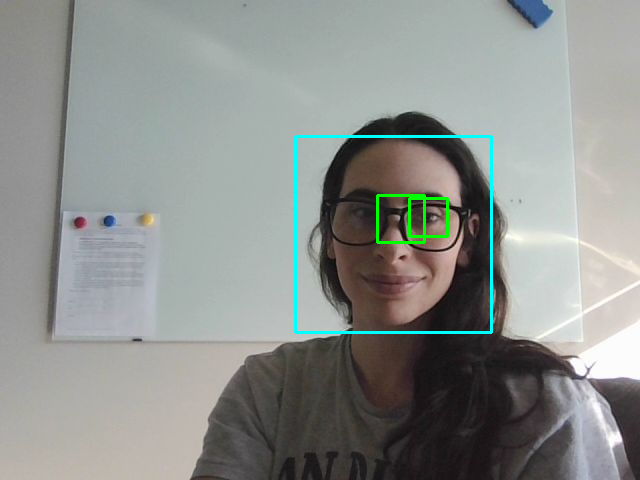

In [14]:
# Here we call the function and open the camera
# Call function and open the camera
image_file = take_photo()

#Show the read image
image = cv2.imread('/content/photo.jpg')#read the image and show it here
gray = cv2.imread('/content/photo.jpg',0)
cv2_imshow(image)

#Repeat the above code to detect the face and eyes in your image
# Here you should see your image while the face and eyes are detected
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(image,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = image[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

cv2_imshow(image)

**Part 3- Parameter detection**

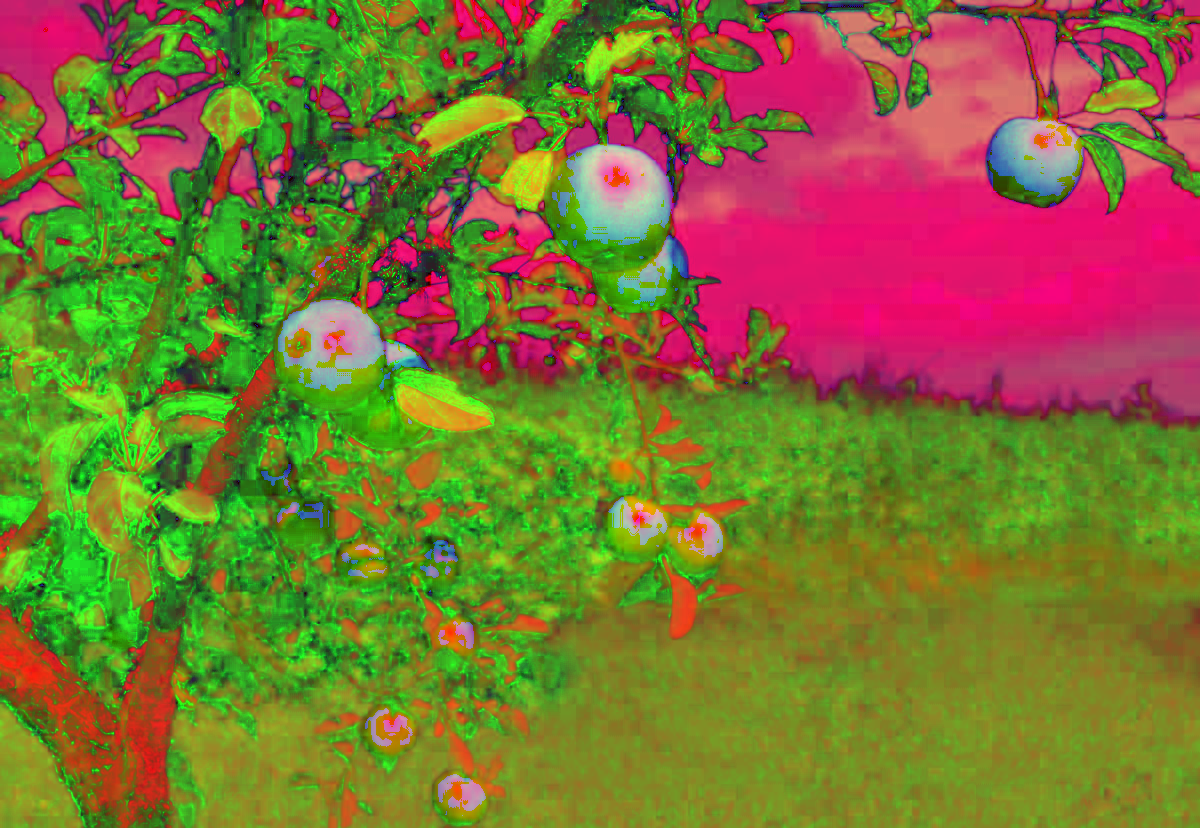

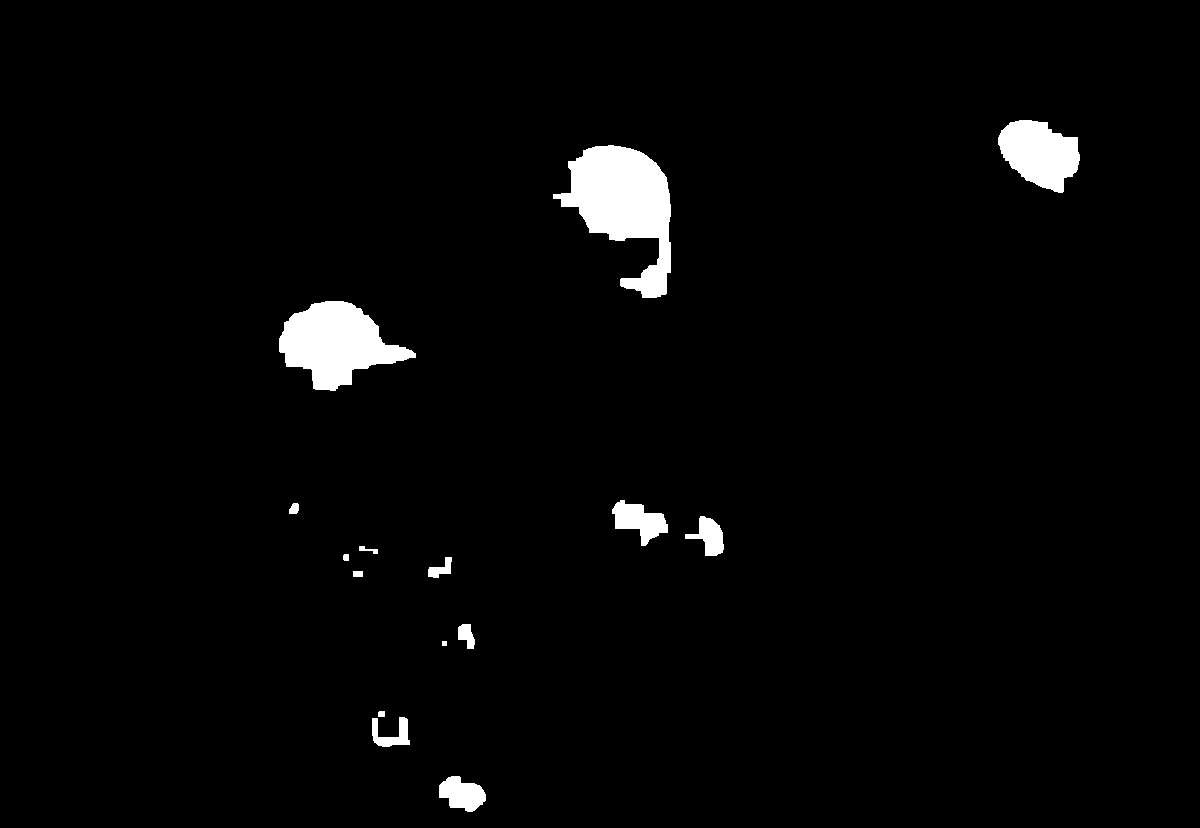

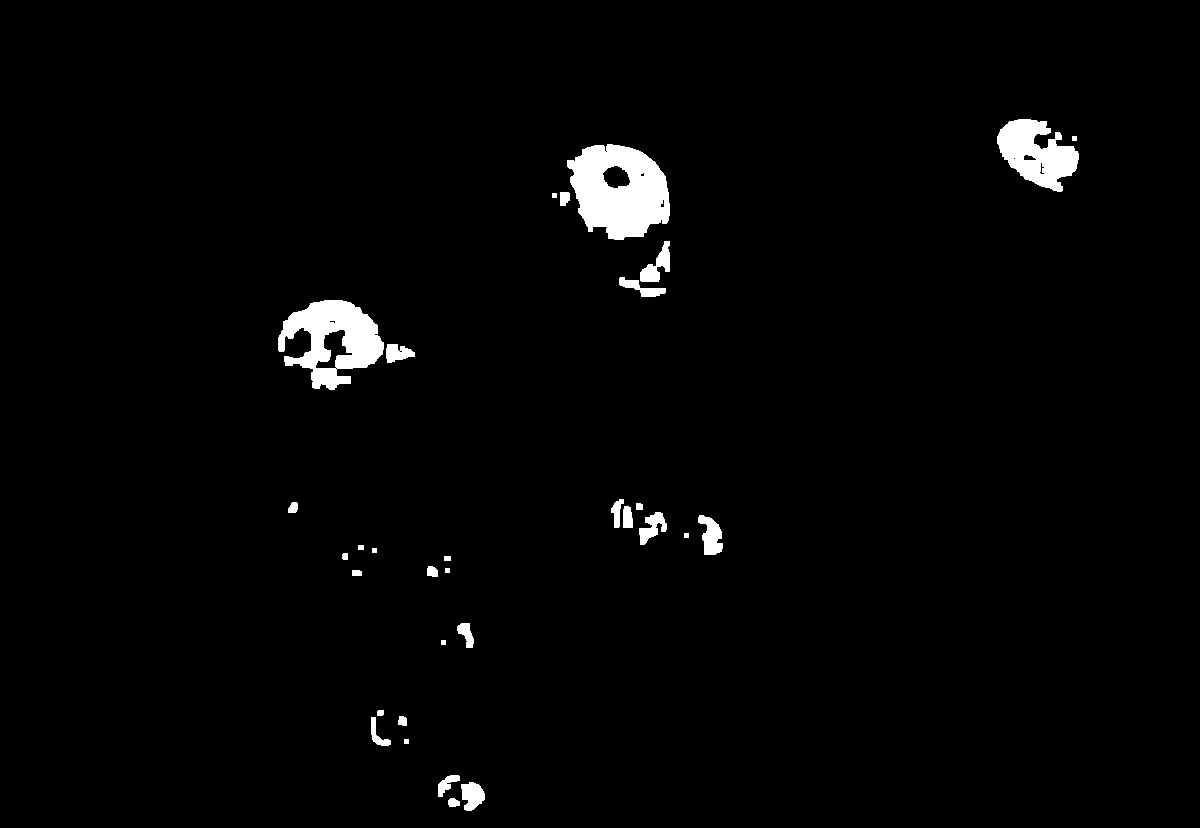

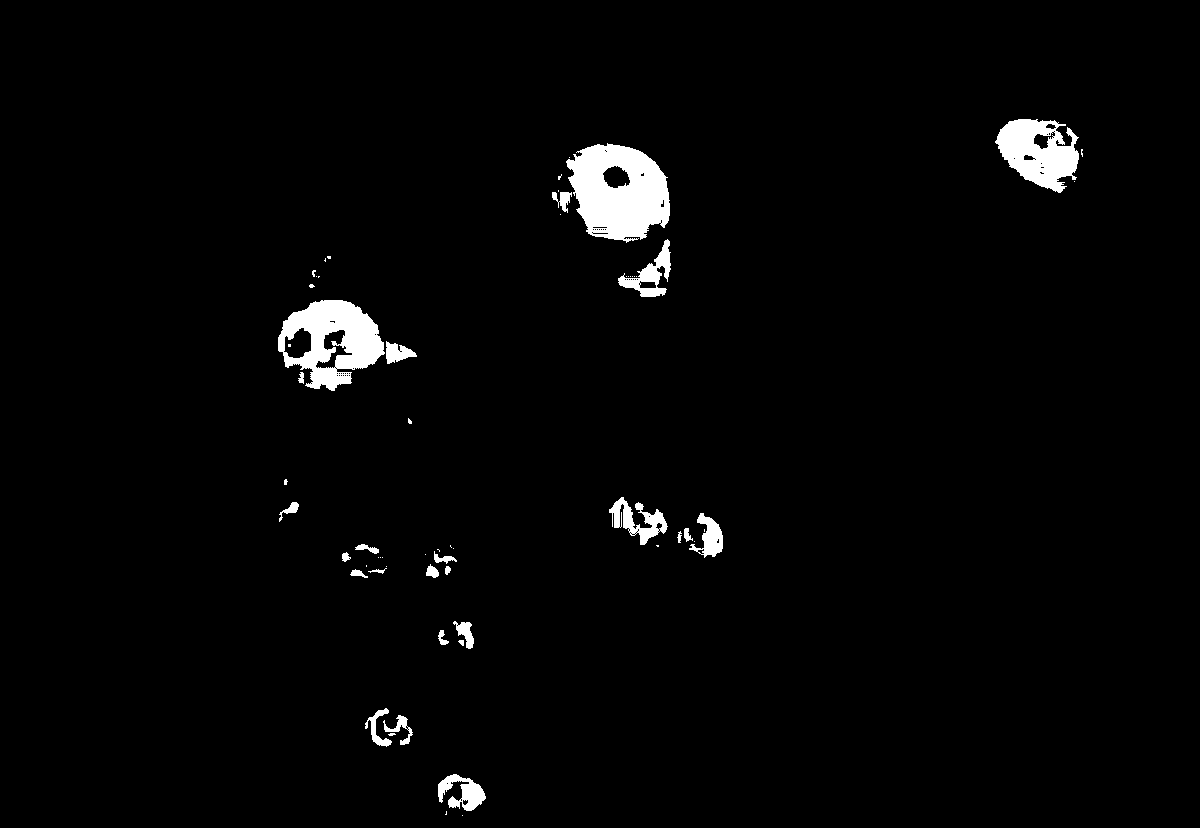

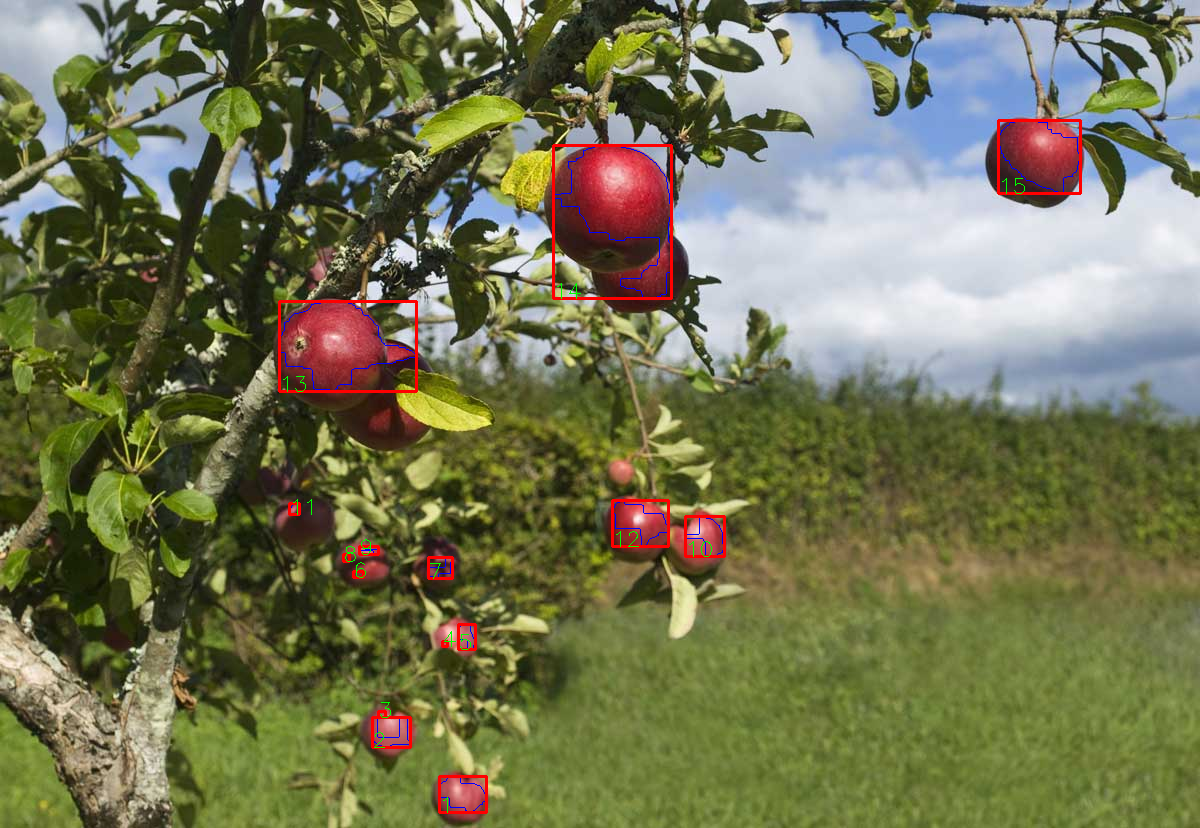

In [12]:
lowerBound=np.array([170,100,80])
upperBound=np.array([180,256,256])

#cam= cv2.VideoCapture(0)
kernelOpen=np.ones((5,5))
kernelClose=np.ones((20,20))

font = cv2.FONT_HERSHEY_SIMPLEX

img=cv2.imread('/content/apple.jpg')

#convert BGR to HSV
imgHSV= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Show this image
cv2_imshow(imgHSV)
# create the Mask
mask=cv2.inRange(imgHSV,lowerBound,upperBound)
#morphology
maskOpen=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernelOpen)
maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernelClose)

maskFinal=maskClose
conts,h=cv2.findContours(maskFinal.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img,conts,-1,(255,0,0),1)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0))

cv2_imshow(maskClose)
cv2_imshow(maskOpen)
cv2_imshow(mask)
cv2_imshow(img)



In [13]:
print( 'There were ',len(conts) ,' apples in this picture') #Print number of apples

There were  15  apples in this picture


REFERENCES:  
Howse, J. & Minchino, J. (2020). Learning OpenCV 4 computer vision with Python 3. (3rd ed.). Packt